In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from pandas import DatetimeIndex
from wordcloud import WordCloud , STOPWORDS

%matplotlib inline
plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')


In [69]:
columns = ['ID','Region','Territory','Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved',
'Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Submitted_for_Approval','Bureaucratic_Code',
          'Account_Created_Date','Billing_Country','Account_Name','Opportunity_Name','Opportunity_ID','Stage','Total_Amount_Currency'
          ,'Total_Amount','Total_Taxable_Amount_Currency','Total_Taxable_Amount'] 
df = pd.read_csv('Entrenamieto_ECI_2020.csv',usecols=columns)
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,Netherlands,Account_Name_619,Opportunity_Name_12598,0,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,Netherlands,Account_Name_619,Opportunity_Name_12600,1,EUR,"48,230.00",EUR,"48,230.00",Closed Won
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,United States,Account_Name_1794,Opportunity_Name_469,2,USD,"83,865.60",USD,"83,865.60",Closed Won
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,United States,Account_Name_1201,Opportunity_Name_415,3,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,United States,Account_Name_1201,Opportunity_Name_851,4,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost


In [70]:
df.loc[df.Region == 'Japan', 'Territory'] = 'Japan'
df.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,Netherlands,Account_Name_619,Opportunity_Name_12598,0,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,Netherlands,Account_Name_619,Opportunity_Name_12600,1,EUR,"48,230.00",EUR,"48,230.00",Closed Won
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,United States,Account_Name_1794,Opportunity_Name_469,2,USD,"83,865.60",USD,"83,865.60",Closed Won
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,United States,Account_Name_1201,Opportunity_Name_415,3,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,United States,Account_Name_1201,Opportunity_Name_851,4,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,United States,Account_Name_1201,Opportunity_Name_939,5,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,United States,Account_Name_1201,Opportunity_Name_1618,6,USD,"2,659,494.60",USD,"2,659,494.60",Closed Lost
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,United States,Account_Name_1794,Opportunity_Name_8227,7,USD,"50,688.00",USD,"50,688.00",Closed Won
8,24353,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,Japan,Account_Name_1888,Opportunity_Name_6151,8,JPY,"15,600.00",JPY,"470,400.00",Closed Lost
9,24355,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,Japan,Account_Name_1888,Opportunity_Name_6151,8,JPY,"4,400.00",JPY,"470,400.00",Closed Lost


In [71]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [54]:
df_conv = df.loc[(df['Stage'] == 'Closed Lost') | (df['Stage'] == 'Closed Won')][['Stage','Bureaucratic_Code']]
ax = sns.countplot(x='Bureaucratic_Code', hue='Stage', data=df_conv)
ax.set_yscale('log')

ax.legend(loc='upper left',bbox_to_anchor=(0, 1.1))
ax.set_xlabel('Cantidad (log)');
ax.set_ylabel('Marca');
ax.set_title('Relación de conversiones y checkouts en escala logarítmica');
sns.set(font_scale=3)

ValueError: min() arg is an empty sequence

In [46]:
print(df.shape)

(16947, 19)


In [47]:
df['Bureaucratic_Code_0_Approved'].value_counts()

0    11543
1     5404
Name: Bureaucratic_Code_0_Approved, dtype: int64

In [48]:
df['Bureaucratic_Code_0_Approval'].value_counts()

0    8889
1    8058
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [74]:
df['Stage'].replace({"Closed Lost": 0, "Closed Won": 1, 'Proposal': 1, 'Negotiation':1,'Qualification':1}, inplace=True)
new = df[['Region','Territory','Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved','Opportunity_ID','Stage']]
df['Stage'] = pd.to_numeric(df['Stage'])
#new.loc[df.Stage == 'Close Lost', 'Stage'] = 0
#new.loc[df.Stage == 'Close Won', 'Stage'] = 1
new.head(10)

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Opportunity_ID,Stage
0,EMEA,None,1,1,0,0
1,EMEA,None,0,0,1,1
2,Americas,NW America,0,0,2,1
3,Americas,NW America,1,0,3,0
4,Americas,NW America,1,0,4,0
5,Americas,NW America,1,0,5,0
6,Americas,NW America,1,0,6,0
7,Americas,NW America,1,1,7,1
8,Japan,Japan,1,0,8,0
9,Japan,Japan,1,0,8,0


In [72]:
territorios = df.groupby(['Territory']).size().nlargest(15)
territorios

Territory
Japan             4892
Germany           1682
NW America        1568
Australia         1208
India              809
None               788
NE America         760
Netherlands        533
SE America         493
France             449
Singapore          441
United Kingdom     313
Belgium            285
Italy              283
Spain              268
dtype: int64

In [75]:
location_counts = df['Territory'].value_counts(dropna=True)
territorios = {
    'Japan','Germany','NW America','Australia','India','None','NE America','Netherlands','SE America','France','Singapore'
    ,'United Kingdom','Belgium','Italy','Spain'
}

#territorios = df.groupby(['Territory']).size().nlargest(20)
terri = [x for x in location_counts.index.tolist() if x in territorios]
country_df = pd.DataFrame()
for c in terri:
    country_df[c] = pd.Series(dtype=object)
country_df = country_df.transpose()
country_df.loc[:, 'Wons'] = country_df.index.map(lambda x: df[(df['Territory'] == x)]['Stage'].sum())
country_df.loc[:, 'Losts'] = country_df.index.map(lambda x: df[(df['Territory'] == x)]['Stage'].apply(lambda y: 1 - y).sum())

#op = new.groupby(['Opportunity_ID']).size().nlargest(15)

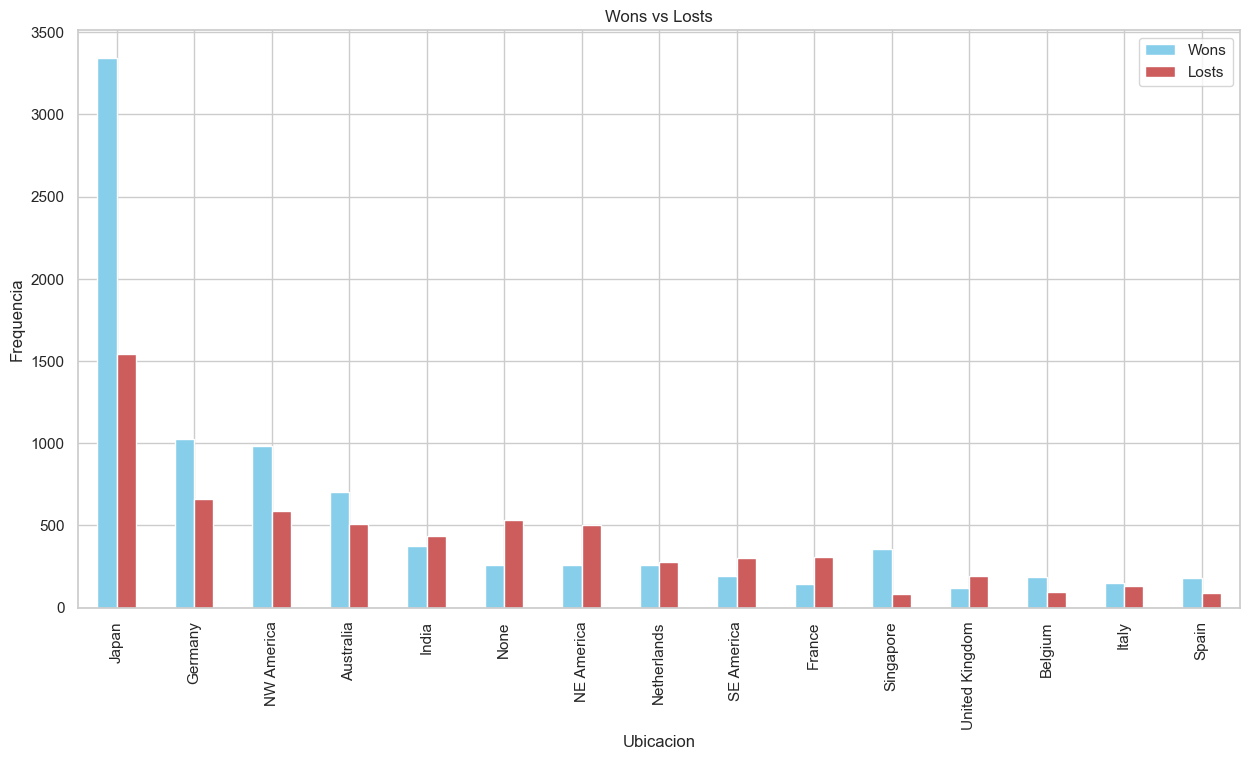

In [76]:
ax = country_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Wons vs Losts")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

In [82]:
terr_stage = df.groupby(['Territory','Stage']).agg({'Stage':['mean','count']})
terr_stage['Territory'].get_group('Japan')


KeyError: 'Territory'

In [101]:
group = df.groupby(['Bureaucratic_Code','Stage']).agg({'Stage':['count']})
group

Stage
                          count
Bureaucratic_Code   Stage      
Bureaucratic_Code_0 1        51
Bureaucratic_Code_1 0       159
                    1       102
Bureaucratic_Code_2 0       128
                    1       114
Bureaucratic_Code_3 0         1
                    1         1
Bureaucratic_Code_4 0      4291
                    1      8296
Bureaucratic_Code_5 0      2771
                    1      1032
Bureaucratic_Code_6 1         1

In [41]:
aprobados = df.loc[df['Stage'] == 1]['Bureaucratic_Code'].value_counts.head()
print("Aprobados") ; display(aprobados)

AttributeError: 'function' object has no attribute 'head'

In [37]:
burocraticos = df.loc[df['Bureaucratic_Code','Stage']]
burocraticos.head()

KeyError: ('Bureaucratic_Code', 'Stage')

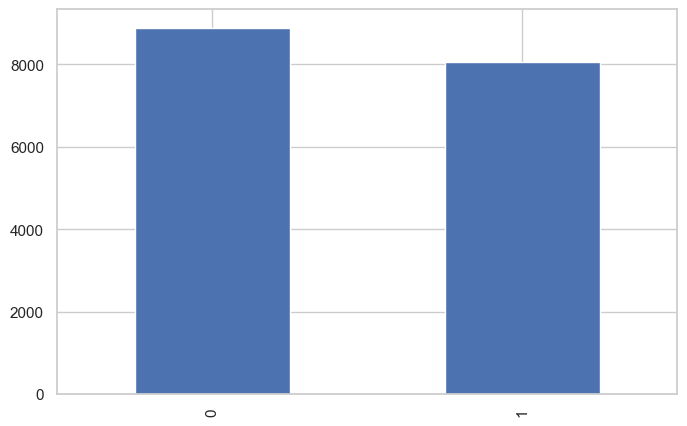

In [86]:
df['Bureaucratic_Code_0_Approval'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

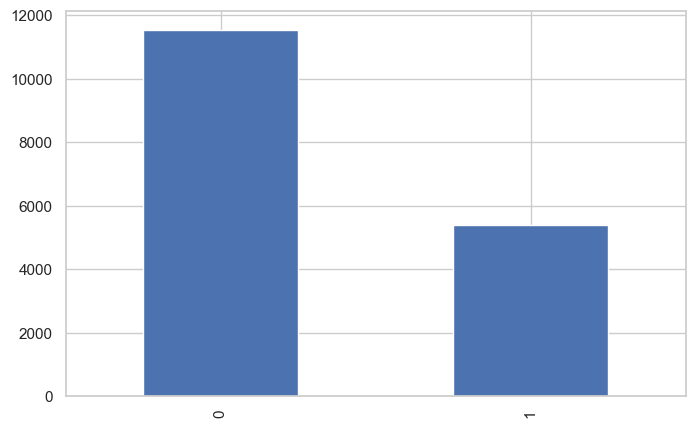

In [87]:
df['Bureaucratic_Code_0_Approved'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

Text(0.5, 1.0, 'Distribucion de keywords por tweets')

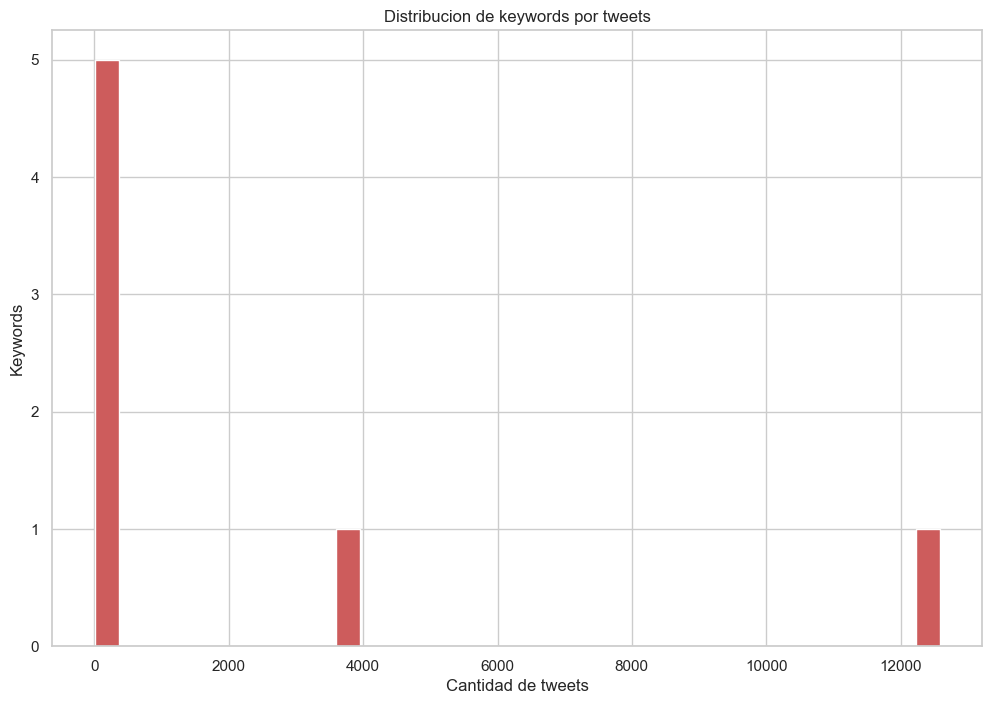

In [92]:
buro_grouped=df.groupby(['Bureaucratic_Code']).agg({'Stage':['mean','count']})
buro_grouped[('Stage','count')].plot(kind='hist', bins=35,figsize=(12,8),color='indianred')
plt.xlabel('Cantidad de tweets')
plt.ylabel('Keywords')
plt.title('Distribucion de keywords por tweets')

Qué son los codigos burocraticos, por qué las oportunidades estan representadas como codigos burocraticos?
Se tienen 6 tipos de codigos burocraticos, donde el que predomina es el codigo burocratico 4. Que significa el codigo burocratico 4? Se presta mayor atencion al codigo burocratico 4, para ver si existe algun patron. Como es la relacion entre el codigo burocratico 4 y el stage.

In [95]:
df['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

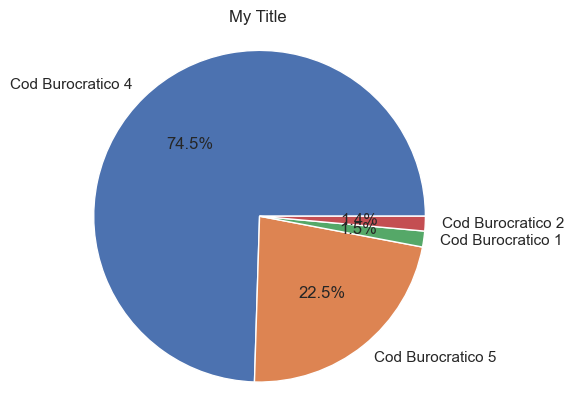

In [100]:
data = df['Bureaucratic_Code'].value_counts().nlargest(4)
#my_labels = 'Cod Burocratico 4','Cod Burocratico 5','Cod Burocratico 1','Cod Burocratico 2', 'Cod Burocratico 0',
#'Cod Burocratico 3','Cod Burocratico 6'
my_labels = 'Cod Burocratico 4','Cod Burocratico 5','Cod Burocratico 1','Cod Burocratico 2'
plt.pie(data, labels=my_labels,autopct='%1.1f%%')
plt.title('My Title')
plt.axis('equal')
plt.show()

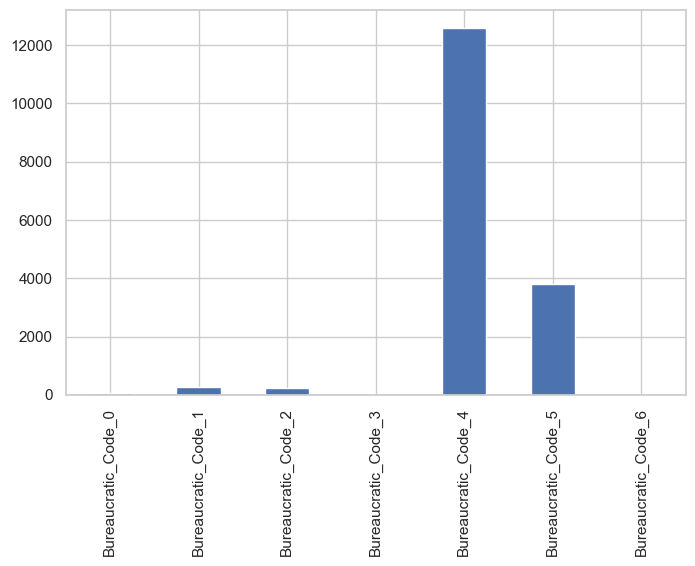

In [85]:
df['Bureaucratic_Code'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

In [27]:
buro = df.groupby(['Bureaucratic_Code_0_Approved','Stage']).agg({'Stage':'count'})
buro

Stage
Bureaucratic_Code_0_Approved Stage       
0                            0       4807
                             1       6736
1                            0       2543
                             1       2861

In [89]:
closes_won=new.loc[(new['Stage']==1),:]
closes_lost=new.loc[(new['Stage']==0),:]

groups_by_closes_won = closes_won.groupby(['Opportunity_ID']).agg({'Stage':'count'})

groups_by_closes_lost = closes_lost.groupby(['Opportunity_ID']).agg({'Stage':'count'})

groups_by_closes_won.reset_index(inplace=True)
groups_by_closes_lost.reset_index(inplace=True)

groups_by_closes_won.set_index('Opportunity_ID', inplace=True)
groups_by_closes_lost.set_index('Opportunity_ID', inplace=True)



In [77]:
new['Stage'].value_counts()

1    9597
0    7350
Name: Stage, dtype: int64

In [ ]:
groups_by_closes_won['Stage'].plot(kind='bar',figsize=(16,8),rot=85,title=\
        'Won a partir de op ID',color='Seagreen');
groups_by_closes_lost['Stage'].plot(kind='bar',figsize=(16,8),\
        bottom=groups_by_closes_won['Stage'],rot=85,color='Indianred');
ax=plt.gca()
ax.set_ylabel('Ocurrencias')
ax.set_xlabel('Caracteres de la keyword');
ax.legend(labels=['Won', 'Lost'])

In [59]:
op = new.groupby(['Region']).agg({'Stage':['count']})
op
#grouped=oscars_short.groupby(['award']).agg({'age_at_award':['mean','count']}) 


,Stage
,count
Region,
APAC,3262
Americas,3945
EMEA,4664
Japan,4892
Middle East,184


In [63]:
op = new.groupby(['Opportunity_ID']).size().nlargest(15)
op


Opportunity_ID
2008     36
12460    36
5123     26
6606     26
2911     24
767      18
4568     16
6652     16
6653     16
6654     16
7568     16
8698     16
2653     14
6569     14
7565     14
dtype: int64

In [51]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [25]:
df["Account_Created_Date"] = pd.to_datetime(df["Account_Created_Date"], format='%m/%d/%Y')
df['Account_Created_Year'] = DatetimeIndex(df["Account_Created_Date"]).year
df.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Account_Created_Year
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,Netherlands,Account_Name_619,Opportunity_Name_12598,0,EUR,5272800.0,EUR,5272800.0,Closed Lost,2015
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,Netherlands,Account_Name_619,Opportunity_Name_12600,1,EUR,48230.0,EUR,48230.0,Closed Won,2015
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,United States,Account_Name_1794,Opportunity_Name_469,2,USD,83865.6,USD,83865.6,Closed Won,2015
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_415,3,USD,7421881.5,USD,7421881.5,Closed Lost,2013
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_851,4,USD,13357192.5,USD,13357192.5,Closed Lost,2013
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_939,5,USD,14838277.5,USD,14838277.5,Closed Lost,2013
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_1618,6,USD,2659494.6,USD,2659494.6,Closed Lost,2013
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2015-04-21,United States,Account_Name_1794,Opportunity_Name_8227,7,USD,50688.0,USD,50688.0,Closed Won,2015
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,Japan,Account_Name_1888,Opportunity_Name_6151,8,JPY,15600.0,JPY,470400.0,Closed Lost,2015
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,Japan,Account_Name_1888,Opportunity_Name_6151,8,JPY,4400.0,JPY,470400.0,Closed Lost,2015


In [45]:
df['Total_Amount_Currency'].value_counts()

USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: Total_Amount_Currency, dtype: int64

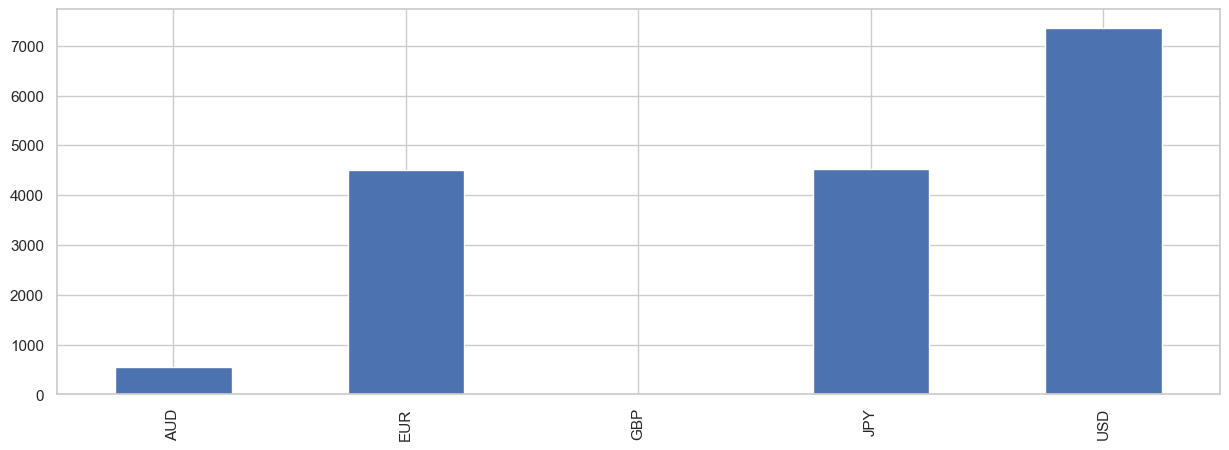

In [47]:
df['Total_Amount_Currency'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [46]:
df['Total_Taxable_Amount_Currency'].value_counts()

USD    7347
JPY    4525
EUR    4518
AUD     553
GBP       4
Name: Total_Taxable_Amount_Currency, dtype: int64

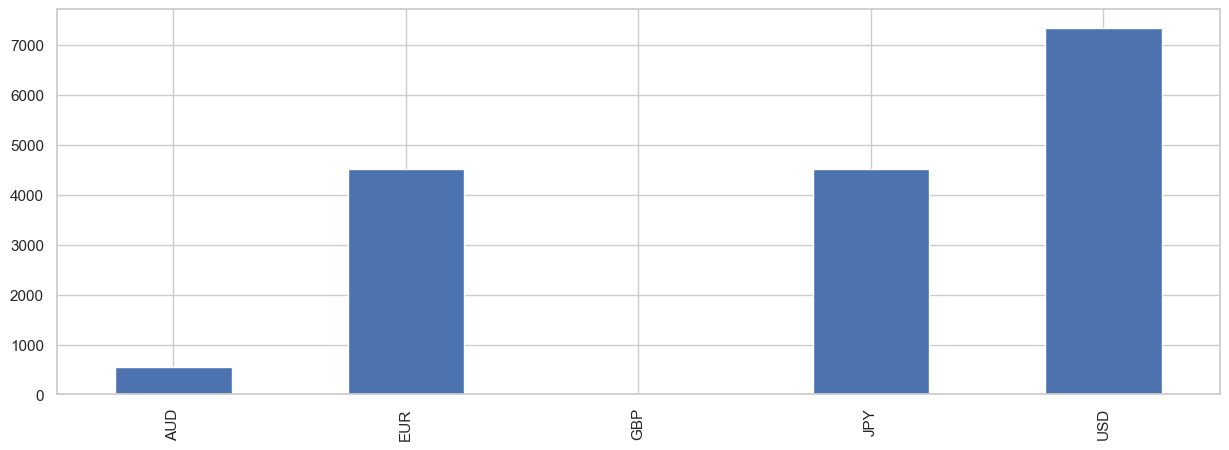

In [48]:
df['Total_Taxable_Amount_Currency'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [40]:
closes = df.groupby('Stage')
print(closes)

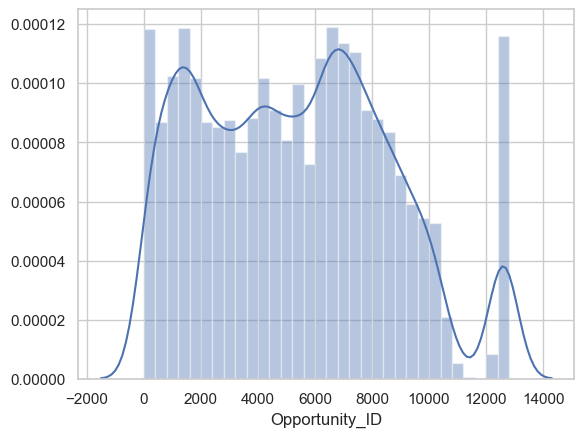

In [42]:
sns.distplot(df['Opportunity_ID'])

In [3]:
df['Submitted_for_Approval'].value_counts()

0    16947
Name: Submitted_for_Approval, dtype: int64

In [14]:
df['Opportunity_ID'].value_counts()

12460    36
2008     36
5123     26
6606     26
2911     24
         ..
7482      1
5435      1
3400      1
7498      1
0         1
Name: Opportunity_ID, Length: 9841, dtype: int64

In [4]:
df['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [5]:
df['Prod_Category_A'].value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

Estas 3 columnas de arriba no presentan informacion relevante. Tienen en toda sus columnas los mismos valores.

In [6]:
df['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [7]:
print('Cantidad de usuarios: {}'.format(df['ID'].nunique()))

Cantidad de usuarios: 16947


In [28]:
df.isnull().any()

ID                                    False
Region                                False
Territory                             False
Pricing, Delivery_Terms_Quote_Appr    False
Pricing, Delivery_Terms_Approved      False
Bureaucratic_Code_0_Approval          False
Bureaucratic_Code_0_Approved          False
Submitted_for_Approval                False
Bureaucratic_Code                     False
Account_Created_Date                  False
Billing_Country                       False
Account_Name                          False
Opportunity_Name                      False
Opportunity_ID                        False
Total_Amount_Currency                 False
Total_Amount                           True
Total_Taxable_Amount_Currency         False
Total_Taxable_Amount                  False
Stage                                 False
Account_Created_Year                  False
dtype: bool

In [29]:
df['Total_Amount'].value_counts()

     6,200.00    513
     4,400.00    461
    18,000.00    353
   140,000.00    272
     1,600.00    204
                ... 
   193,600.00      1
     4,972.80      1
 8,001,840.00      1
12,333,750.00      1
    11,960.00      1
Name: Total_Amount, Length: 8872, dtype: int64

In [30]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,Total_Amount,Total_Taxable_Amount,Account_Created_Year
count,"16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,888.00","16,947.00","16,947.00"
mean,"17,666.65",0.81,0.58,0.48,0.32,0.00,"5,335.94","1,993,659.22","3,224,116.79","2,014.96"
std,"6,940.86",0.39,0.49,0.50,0.47,0.00,"3,324.72","18,484,259.88","20,303,604.73",1.51
min,"4,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,013.00"
25%,"11,953.00",1.00,0.00,0.00,0.00,0.00,"2,448.50","26,775.00","85,465.80","2,013.00"
50%,"18,114.00",1.00,1.00,0.00,0.00,0.00,"5,306.00","107,250.00","376,067.25","2,015.00"
75%,"23,845.50",1.00,1.00,1.00,1.00,0.00,"7,698.00","460,389.83","1,037,450.00","2,016.00"
max,"28,773.00",1.00,1.00,1.00,1.00,0.00,"12,803.00","1,320,000,000.00","1,356,338,620.00","2,018.00"


In [37]:
subset = df.loc[8:30, ["Region", "Total_Taxable_Amount", "Total_Amount", "Stage", "Opportunity_Name"]]
# subset tiene 23 filas pero sólo 6 opportunity_name distintos
print(f"Filas: {subset.shape[0]}, oportunidades: {subset.Opportunity_Name.nunique()}") 
# Sumamos a ver si coincide
sumado = subset\
.groupby(["Opportunity_Name", "Stage", "Region"])\
.agg({"Total_Taxable_Amount": lambda s: s.iloc[0], "Total_Amount": sum})
# Revisemos si coincide:
print("Coinciden todos en el subset: ", all(abs(sumado.Total_Taxable_Amount-sumado.Total_Amount) < 0.01))

Filas: 23, oportunidades: 6
Coinciden todos en el subset:  True


Text(0.5, 1.0, 'Países con más visitas')

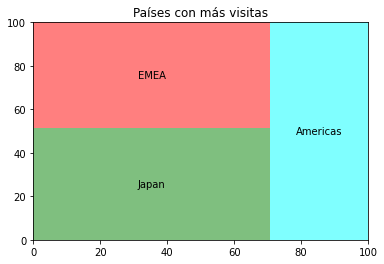

In [15]:
countries = df['Region'].value_counts()
#countries = countries.drop('Unknown')
data = countries.head(3)

visu = squarify.plot(data, label=data.index, alpha=.5, color=['green','red','cyan'])
visu.set_title('Países con más visitas')

#plt.savefig('informe/figures/050-paises_visitas-treemap.png')

Cuantas cuentas fueron creadas por año.

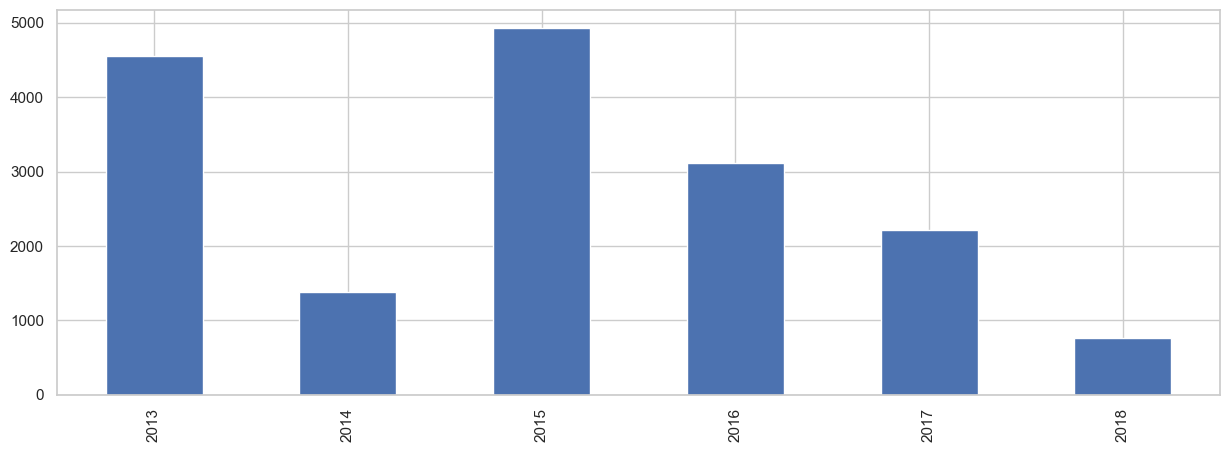

In [27]:
df['Account_Created_Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [9]:
regiones = df['Region'].value_counts()
regiones

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

Text(0.5, 1.0, 'Regiones mas ocurrentes')

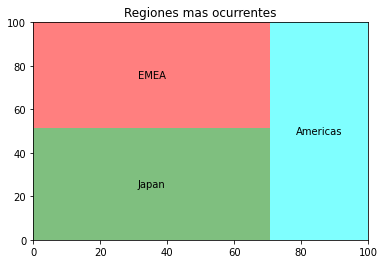

In [10]:
data = regiones.head(3)

visu = squarify.plot(data, label=data.index, alpha=.5, color=['green','red','cyan'])
visu.set_title('Regiones mas ocurrentes')


Text(0.5, 0, 'Región')

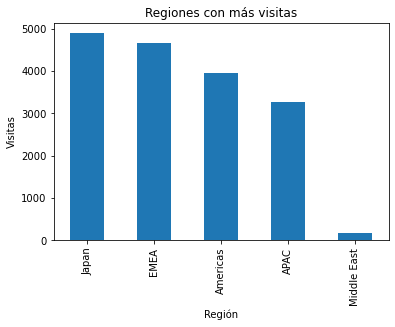

In [12]:
regiones = df['Region']
data = regiones.value_counts()
#data = data.drop('Unknown')

fig = data.head(7).plot(kind='bar')
fig.axes.set_title('Regiones con más visitas')
fig.axes.set_ylabel('Visitas')
fig.axes.set_xlabel('Región')

In [13]:
dom_facturacion = df['Billing_Country'].value_counts()
dom_facturacion

Japan            4879
United States    3802
Germany          1979
Australia        1169
India             672
                 ... 
Colombia            1
Kenya               1
Oman                1
Morocco             1
Ecuador             1
Name: Billing_Country, Length: 80, dtype: int64

In [16]:
terri = df['Territory'].value_counts()
terri

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Croatia               1
Czech Republic        1
Solomon Islands       1
Monaco                1
Burma                 1
Name: Territory, Length: 76, dtype: int64

In [16]:
terri.head(20)

None              4999
Germany           1682
NW America        1568
Australia         1208
India              809
NE America         760
Japan              681
Netherlands        533
SE America         493
France             449
Singapore          441
United Kingdom     313
Belgium            285
Italy              283
Spain              268
Central US         254
China (PRC)        218
SW America         206
Thailand           173
Indonesia          154
Name: Territory, dtype: int64

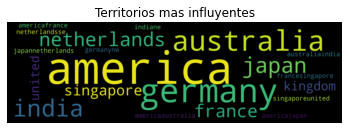

In [44]:
territorios = df['Territory'].replace(to_replace='None', value=np.nan).dropna()
territorios = territorios.apply(lambda x: x.lower())
territorios = territorios.value_counts()
territorios = territorios[territorios >= 300]

text = ''
for w,q in zip(territorios.index,territorios):
    text += ' '.join([w for x in range(q)])

text = ' '.join([s for s in text.split() if len(s)>2])    

wordcloud = WordCloud(width=3000, height=900, margin=0,collocations=False).generate(text)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Territorios mas influyentes')
plt.show()

wordcloud.to_image().save('territorios.png')

New:
[]


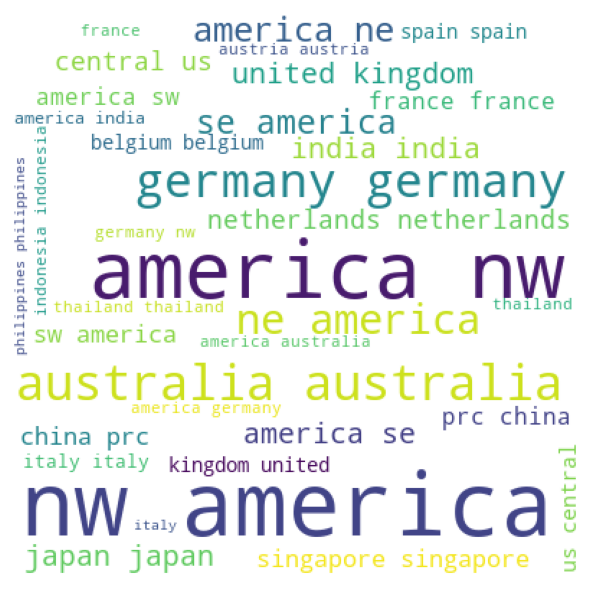

In [17]:
territorios = df['Territory'].replace(to_replace='None', value=np.nan).dropna()
comment_words = '' 
stopwords = set(STOPWORDS) 

words = []

new_words = sorted(set(words), key=lambda x:words.index(x))
print('New:')
print(new_words)
# iterate through the csv file 
for val in territorios: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

#print(comment_words)
#newlist = sorted(set(mylist), key=lambda x:mylist.index(x))
#new_words = sorted(set(comment_words, key=lambda x:comment_words.index(x)))
#print('New:')
#print(new_words)
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

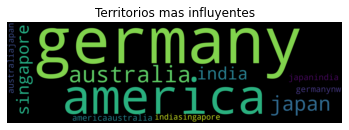

In [3]:
#des_brazil = df.loc[(df['country'] == 'Brazil')]
closes_won = df.loc[(df['Stage'] == 'Closed Won')]
closes_won = closes_won['Territory'].replace(to_replace='None', value=np.nan).dropna()
closes_won.head(10)
closes_won = closes_won.apply(lambda x: x.lower())
closes_won = closes_won.value_counts()
closes_won = closes_won[closes_won >= 300]

text = ''
for w,q in zip(closes_won.index,closes_won):
    text += ' '.join([w for x in range(q)])

text = ' '.join([s for s in text.split() if len(s) >2])    


wordcloud = WordCloud(width=3000, height=900, margin=0,collocations=False).generate(text)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Territorios mas influyentes')
plt.show()

wordcloud.to_image().save('territorios.png')

In [7]:
closes_won = df.loc[(df['Stage'] == 'Closed Won')]
closes_won['Territory'].replace(to_replace='None', value=np.nan).dropna()
closes_won['Territory'].value_counts()

None               3034
Germany            1023
NW America          973
Australia           696
Japan               546
India               374
Singapore           357
NE America          259
Netherlands         257
China (PRC)         202
Belgium             187
SE America          187
Spain               181
Italy               149
France              143
Austria             124
United Kingdom      122
Central US          104
Thailand             92
Luxembourg           61
Indonesia            55
SW America           46
Philippines          42
Portugal             34
Jordan               33
Cyprus               32
New Zealand          31
Vietnam              23
Canada               23
Poland               21
Denmark              19
Carribean            13
South Korea          12
Hungary              10
Taiwan                9
Norway                8
Estonia               7
Turkey                7
KSA                   6
Switzerland           6
Malta                 5
Sweden          

NWAmerica NWAmerica India Germany NWAmerica United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom India Germany Germany Switzerland Austria Austria Austria United Kingdom United Kingdom India Japan Japan Japan Japan Japan Japan Japan Italy Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan sEAmerica France Spain Singapore Singapore Japan Japan Japan Japan India Japan United Kingdom United Kingdom Japan Japan India France Japan Japan Japan Denmark Austria Austria Austria India Italy United Kingdom Japan Japan Germany United Kingdom United Kingdom India United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom United Kingdom Thailand Thailand France Greece Philippines Singapore India Spain Spain France South Korea Japan Japan Japan Japan Japan Japan Australia Australia Australia Australia Australia Australia Australia Australia A

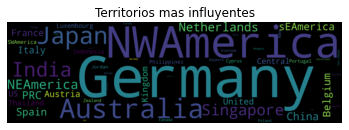

In [69]:
closes_won = df.loc[(df['Stage'] == 'Closed Won'),'Territory']

new = closes_won.replace(to_replace='None', value=np.nan).dropna()
new.replace("NW America","NWAmerica",inplace=True)
new.replace("NE America", "NEAmerica",inplace=True)
new.replace("SW America", "SWAmerica",inplace=True)
new.replace("SE America", "sEAmerica",inplace=True)
#print(new)
#closes_won = closes_won['Territory'].replace(to_replace='None', value=np.nan).dropna()

#new = closes_won.replace("NW America", "NWAmerica")
#display(new)
#new2 = new.replace("NE America", "NEAmerica")
#display(new2)
#closes_won['Territory'].replace("NE America", "NEAmerica",inplace=True)
#closes_won['Territory'].replace("SW America", "SWAmerica",inplace=True)
#closes_won['Territory'].replace("SE America", "SEAmerica",inplace=True)
#new = closes_won['Territory']
#print(new)
#closes_won.head(10)
#closes_won = closes_won.apply(lambda x: x.lower())
#closes_won = closes_won.value_counts()
#closes_won = closes_won[closes_won >= 300]

text = ' '.join(new)


wordcloud2 = WordCloud(width=3000, height=900, margin=0,collocations=False).generate(text)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Territorios mas influyentes')
plt.show()



